In [1]:
from src.parameters import Parameters
from src.experiment import Experiment
from imports.general import *
from imports.ml import *

parameters = Parameters({"surrogate":"RF",
"experiment":"1",
"acquisition":"EI",
"data_name":"benchmark",
"n_evals":40,
"recalibrate":False,
"bo":True,
"extensive_metrics":True,
"d":3,
"recal_mode":"cv",
"problem_idx":5, 
"seed":0 ,
"n_initial":10},mkdir=True)
experiment = Experiment(parameters)
experiment.run()

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
from src.parameters import Parameters
from src.experiment import Experiment
from src.dataset import Dataset
from imports.general import *
from imports.ml import *
parameters = Parameters({"surrogate":"RF",
"data_name":"mnist",
"seed":0,
"bo":True,},mkdir=True)
experiment = Experiment(parameters)
experiment.run()

In [ ]:
plt.plot(experiment.metrics.summary["p_array"],experiment.metrics.summary["y_calibration"][0])
plt.plot(experiment.metrics.summary["p_array"],experiment.metrics.summary["y_calibration"][1])
plt.plot(experiment.metrics.summary["p_array"],experiment.metrics.summary["p_array"])


In [ ]:
if parameters.d == 1:
	idx = np.argsort(experiment.dataset.data.X_test.squeeze())
	X_test = experiment.dataset.data.X_test[idx]
	y_test = experiment.dataset.data.y_test[idx]
	mu,sigma = experiment.optimizer.surrogate_object.predict(X_test)
	mu = mu.squeeze()
	sigma = 2*sigma.squeeze()
	fig = plt.figure()
	plt.plot(X_test, mu, marker=".")
	plt.fill_between(X_test.squeeze(), mu-sigma,mu+sigma,alpha=0.2)
	plt.plot(X_test, y_test,"x",alpha=0.2)
	plt.plot(experiment.dataset.data.X_train, experiment.dataset.data.y_train,"o")

	fig = plt.figure()
	a_vals = experiment.optimizer.acquisition_function(torch.from_numpy(np.expand_dims(X_test, 1))).cpu().detach().squeeze()
	plt.plot(X_test,a_vals)

# 1. Extensive investigation

In [3]:
from figs.scripts.loader import Loader
from figs.scripts.tables import Tables
from figs.scripts.figures import Figures
from imports.general import *
from imports.ml import *
loader = Loader()
loader.path2sql(["results_regret_vs_calibration__"])
tables = Tables()
figures = Figures()
# # For paper:
# Tabel 1:
# tables.table_linear_correlation_all()
# # Tabel 2:
# tables.table_linear_model(X_bo=False)
# # Tabel 3:
# tables.table_linear_model(X_bo=True)
# # Figure 1:
# figures.figure_regret_calibration(settings_x = {"bo": True, "metric": "f_regret"},
#         settings_y = {"bo": True, "metric": "y_calibration_mse"},
#         x_figsettings= {"label": r"$\mathcal{R}_I(f)$", "log": True},
#         y_figsettings= {"label": r"$\mathcal{C}_{BO}(y)$", "log": True},)

# figures.figure_regret_calibration(settings_x = {"bo": True, "metric": "f_regret"},
#         settings_y = {"bo": False, "metric": "y_calibration_mse"},
#         x_figsettings= {"label": r"$\mathcal{R}_I(f)$", "log": True},
        # y_figsettings= {"label": r"$\mathcal{C}_{R}(y)$", "log": True},)




TypeError: object of type 'NoneType' has no len()

In [ ]:
from figs.scripts.figures import Figures
from figs.scripts.tables import Tables
from imports.general import *
from imports.ml import *
figures = Figures()
tables = Tables()
loader = Loader()
cnx = sqlite3.connect("./results.db")
table_name = "results_regret_vs_calibration"
query = loader.dict2query(FROM=table_name, SELECT=["surrogate"])
df = pd.read_sql(query, cnx)
surrogates = sorted(df["surrogate"].unique())
snr = 10
markers = ["o", "v", "s", "x", "d"]
colors = plt.cm.plasma(np.linspace(0, 1, len(markers)))

row = ""
for bo in [False, True]:
    plt.figure()
    for recal in [False]:
        for i_s,surrogate in enumerate(surrogates):
            x1 = pd.read_sql(
                loader.dict2query(
                    FROM=table_name,
                    SELECT=[
                        "f_regret",
                        "y_calibration_mse",
                    ],
                    WHERE={"bo": bo, "recalibrate": recal, "snr": snr, "std_change":1.0, "surrogate":surrogate},
                    ORDERBY=["seed", "d", "problem", "surrogate",],
                ),
                cnx,
            )
            if surrogate not in ["RS","DS"]:
                x1 = x1.replace("NULL", np.nan, regex=True)
                x1 = x1.dropna(how="any", axis=0)
                x = x1[["y_calibration_mse"]].to_numpy() + 1e-8
                y = x1[["f_regret"]].to_numpy() + 1e-8
                rho,p_val  = pearsonr(x.squeeze(), y.squeeze())
                print(surrogate,rho,p_val)
                plt.plot(y,x,markers[i_s],color=colors[i_s])
                plt.xscale("log");
                plt.yscale("log");

# 2. Change in predictive std

In [ ]:
from figs.scripts.figures import Figures
from figs.scripts.loader import Loader
from imports.general import *
from imports.ml import *
figures = Figures()
loader = Loader()
# loader.path2sql(["results_change_std"])

# figures.figure_std_vs_metric(settings={
#             "data_name": "benchmark",
#             "epoch": 90,
#             "snr": 100,
#             "bo": False,
#         })
# figures.figure_std_vs_metric(settings={
#             "data_name": "benchmark",
#             "epoch": 90,
#             "snr": 100,
#             "bo": True,
#         })
# figures.figure_std_vs_metric(settings={
#             "data_name": "benchmark",
#             "epoch": 90,
#             "snr": 100,
#             "bo": True,
#         },y = "f_regret")
figures.scatter_regret_calibration_std_change(average=True)


# 3. The effect of the number of samples

1.044617285006442


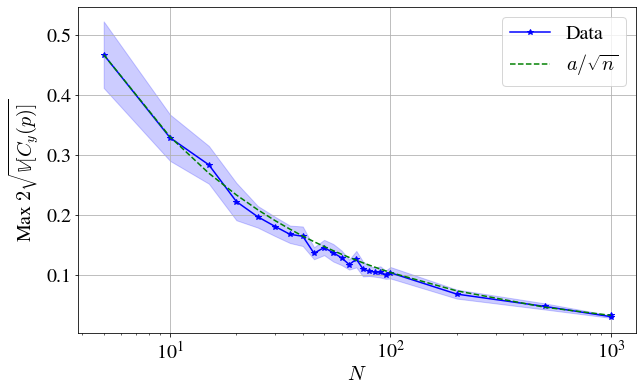

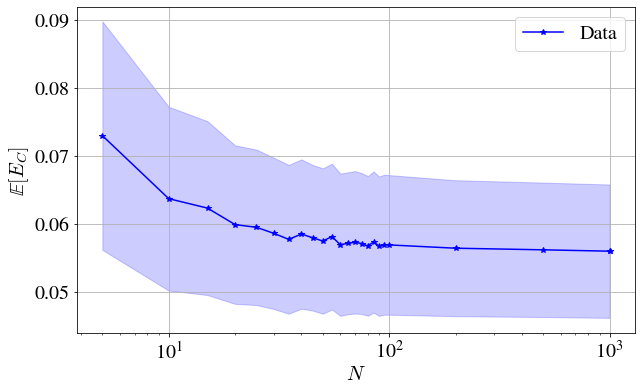

In [1]:
from imports.general import *
from imports.ml import *
from theory_experiments.samples import SamplesExperiment
exp = SamplesExperiment(big_plot=False)
exp.run()

In [ ]:
# from scipy.special import erf,erfinv

# def g(p,v, mu_t=None):
# 	if mu_t is None:
# 		return 1/2*(1 + erf(v*erfinv(2*p-1)))
# 	else:
# 		return 1/2*(1 + erf(mu_t/np.sqrt(2) + v*erfinv(2*p-1)))

# def g_approx(p,v):	
# 	x = 2*p - 1
# 	return p*x + 1/3*(v-v**3)*x + 1/15*v*(2*v**4 - 5*v**2 + 3)*x**5


# p = np.linspace(0.001,1,100)
# v = np.linspace(0.1,2,10)
# colors = plt.cm.plasma(np.linspace(0, 1, len(v)))

# plt.figure()
# plt.title("Correct mean")
# plt.plot(p,p,"--")
# for i_v,v_ in enumerate(v):
# 	gs = []
# 	g_appoxs = []
# 	for p_ in p:
# 		gs.append(g(p_,v_))
# 		g_appoxs.append(g_approx(p_,v_))
# 	if i_v == len(v)-1 or i_v == 0:
# 		plt.plot(p,gs,color=colors[i_v],label=v_)
# 	else:
# 		plt.plot(p,gs,color=colors[i_v])
# 	# plt.plot(p,g_appoxs,"--",color=colors[i_v])
# plt.xlabel("Expected percentiles (p)")
# plt.ylabel("Observed percentiles")
# plt.legend()

# for mu in [-2.0,2.0]:
# 	plt.figure()
# 	plt.plot(p,p,"--")
# 	plt.title(f"Mean:{mu}")
# 	for i_v,v_ in enumerate(v):
# 		gs = []
# 		for p_ in p:
# 			gs.append(g(p_,v_,mu_t=mu))
# 		if i_v == len(v)-1 or i_v == 0:
# 			plt.plot(p,gs,color=colors[i_v],label=v_)
# 		else:
# 			plt.plot(p,gs,color=colors[i_v])
# 	plt.legend()
# 	plt.xlabel("Expected percentiles (p)")
# 	plt.ylabel("Observed percentiles")


# 4. Recalibration

In [ ]:
from src.parameters import Parameters
from src.recalibrator import Recalibrator
from src.dataset import Dataset
from src.metrics import Metrics
from surrogates.gaussian_process import GaussianProcess

parameters = Parameters({"surrogate":"RF",
"experiment":"1",
"acquisition":"EI",
"data_name":"benchmark",
"n_evals":50,
"n_test":1000,
"snr":10,
"xi":0.0,
"bo":True,
"problem_idx":3, 
"d":1,
"seed":0 ,
"n_initial":10},mkdir=True)

dataset = Dataset(parameters)
model = GaussianProcess(parameters,dataset)
recalibrator = Recalibrator(dataset,model,mode="iid")

model.fit(dataset.data.X_train,dataset.data.y_train)

idx = np.argsort(dataset.data.X_test.squeeze())
X_test = dataset.data.X_test[idx]
y_test = dataset.data.y_test[idx]
mus_,sigmas_ = model.predict(X_test)
mus_ = mus_.squeeze()
sigmas_ = sigmas_.squeeze()
fig = plt.figure()
plt.plot(X_test, mus_, marker=".")
plt.fill_between(X_test.squeeze(), mus_-2*sigmas_,mus_+2*sigmas_,alpha=0.2)
plt.plot(X_test, y_test,"x",alpha=0.2)
plt.plot(dataset.data.X_train, dataset.data.y_train,"o")

mus,sigmas = recalibrator.recalibrate(mus_,sigmas_)
fig = plt.figure()
plt.plot(X_test, mus, marker=".")
plt.fill_between(X_test.squeeze(), mus-2*sigmas,mus+2*sigmas,alpha=0.2)
plt.plot(X_test, y_test,"x",alpha=0.2)
plt.plot(dataset.data.X_train, dataset.data.y_train,"o")

metrics = Metrics(parameters)

metrics.calibration_y_batched(mus_,sigmas_,y_test)
y_calibration_bef = metrics.summary["y_calibration"]

metrics.calibration_y_batched(mus,sigmas,y_test)
y_calibration_aft = metrics.summary["y_calibration"]

fig = plt.figure()
plt.plot(metrics.summary["p_array"],metrics.summary["p_array"],"--")
plt.plot(metrics.summary["p_array"],y_calibration_bef,"-x",label="Before")
plt.plot(metrics.summary["p_array"],y_calibration_aft,"-s",label="After")
plt.legend(); plt.xlabel(r"Expected Confidence Interval"); plt.ylabel("Observed Confidence Interval");



# 5. MNIST

In [1]:
# Make table
from figs.scripts.figures import Figures
from figs.scripts.tables import Tables
from figs.scripts.loader import Loader
from imports.general import *
from imports.ml import *
loader = Loader()
table_name = "results_mnist"
loader.path2sql([table_name],delete_existing=True)
tables = Tables()
tables.table_real_data(table_name=table_name)

  0%|          | 0/170 [00:00<?, ?it/s]

&BNN&$0.064$ & $10.811$ & $0.091$ & $0.511$\\
&DE&$0.003$ & $7.161$ & $0.052$ & $-0.176$\\
&GP&$0.005$ & $8.023$ & $0.019$ & $-0.388$\\
&RF&$0.013$ & $7.676$ & $0.022$ & $0.082$\\
&RS&$2.891$ & $266.003$ & $-$ & $-$\\
&BNN&$0.160$ & $17.823$ & $0.077$ & $0.262$\\
&DE&$0.002$ & $6.781$ & $0.064$ & $0.256$\\
&GP&$0.005$ & $6.894$ & $0.041$ & $0.001$\\
&RF&$0.011$ & $7.250$ & $0.006$ & $-0.677$\\
&RS&$2.891$ & $266.003$ & $-$ & $-$\\


In [ ]:
y_test = -np.load("./datasets/MNIST/optim_dataset/accuracies.npy")
y_test = (y_test-np.mean(y_test))/np.std(y_test)

plt.hist(y_test,bins=100);
plt.xlabel("standardized ");

In [ ]:
np.random.seed(0)
data = []
data_t = []
for e in range(100):
	y_rand = np.random.choice(y_test,size=100)
	y_rand = np.abs(y_rand - np.min(y_test))
	data.append(np.min(y_rand))
	data_t.append(np.sum(np.minimum.accumulate(y_rand)))

print(np.mean(data),np.std(data))
print(np.mean(data_t),np.std(data_t))
